In [4]:
import numpy as np
import os
import netCDF4
from scipy import stats
from scipy import io
from sstanalysis import gfd
from scipy import interpolate as naiso
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sstanalysis import popmodel
reload(popmodel)

<module 'sstanalysis.popmodel' from 'sstanalysis/popmodel.pyc'>

In [35]:
roll = -1080
west, est, sud, nord = 154.9, 180., 30., 45.4
lonrange=np.array([west,est]) 
latrange=np.array([sud,nord])

base_dir = '../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/'

fname = base_dir + 'hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0046-02-01.nc'
f = netCDF4.Dataset(fname)
SSH_Feb = np.roll(f.variables['SSH_2'], roll, axis=2)  # SST(time, lat, lon)
mask = np.roll(f.variables['KMT'], roll, axis=1)
tlon = np.roll(f.variables['TLONG'][:], roll, axis=1)
tlat = np.roll(f.variables['TLAT'][:], roll, axis=1)
Nt_Feb = SSH_Feb.shape[0]

fname = base_dir + 'hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0046-08-01.nc'
f = netCDF4.Dataset(fname)
SSH_Aug = np.roll(f.variables['SSH_2'], roll, axis=2)  # SST(time, lat, lon)
Nt_Aug = SSH_Aug.shape[0]

fname = base_dir + 'hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0046-11-01.nc'
f = netCDF4.Dataset(fname)
SSH_Nov = np.roll(f.variables['SSH_2'], roll, axis=2)  # SST(time, lat, lon)
Nt_Nov = SSH_Nov.shape[0]

fname = base_dir + 'hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0046-05-01.nc'
f = netCDF4.Dataset(fname)
SSH_May = np.roll(f.variables['SSH_2'], roll, axis=2)  # SST(time, lat, lon)
Nt_May = SSH_May.shape[0]

<matplotlib.colorbar.Colorbar instance at 0x7f69cc6f5cf8>

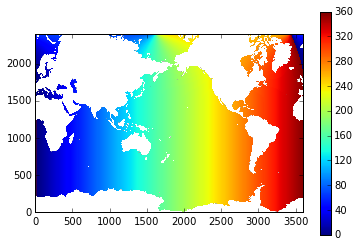

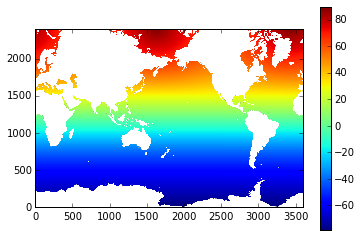

In [11]:
plt.figure()
plt.imshow(np.ma.masked_array(tlon,mask<1), origin='bottom')
plt.colorbar()

plt.figure()
plt.imshow(np.ma.masked_array(tlat,mask<1), origin='bottom')
plt.colorbar()

In [29]:
iKuro = np.argmin(np.abs(tlon[1500,:]-150.))
jKuro = np.argmin(np.abs(tlat[:,iKuro]-35.))
print iKuro, jKuro

ieastPacific = np.argmin(np.abs(tlon[1400,:]-210.))
jeastPacific = np.argmin(np.abs(tlat[:,ieastPacific]-20.))
print ieastPacific, jeastPacific

iGulf = np.argmin(np.abs(tlon[1500,:]-300.))
jGulf = np.argmin(np.abs(tlat[:,iGulf]-40.))
print iGulf, jGulf

1520 1546
2120 1386
3020 1614


<matplotlib.colorbar.Colorbar instance at 0x7f69cc858050>

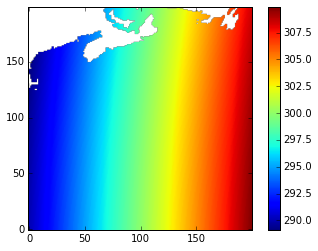

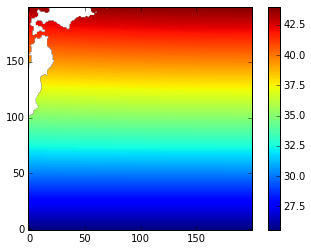

In [30]:
plt.figure()
plt.imshow(np.ma.masked_array(tlon,mask<1)[jGulf-100:jGulf+100,iGulf-100:iGulf+100], origin='bottom')
plt.colorbar()

plt.figure()
plt.imshow(np.ma.masked_array(tlat,mask<1)[jKuro-100:jKuro+100,iKuro-100:iKuro+100], origin='bottom')
plt.colorbar()

# Kuroshio Region #

In [33]:
febKuro = SSH_Feb[:,jKuro,iKuro]-SSH_Feb[:,jKuro,iKuro].mean()
augKuro = SSH_Aug[:,jKuro,iKuro]-SSH_Aug[:,jKuro,iKuro].mean()
mayKuro = SSH_May[:,jKuro,iKuro]-SSH_May[:,jKuro,iKuro].mean()
novKuro = SSH_Nov[:,jKuro,iKuro]-SSH_Nov[:,jKuro,iKuro].mean()

In [34]:
auto_Feb = np.correlate(febKuro[:], febKuro[:], mode='full')
auto_Aug = np.correlate(augKuro[:], augKuro[:], mode='full')
auto_May = np.correlate(mayKuro[:], mayKuro[:], mode='full')
auto_Nov = np.correlate(novKuro[:], novKuro[:], mode='full')

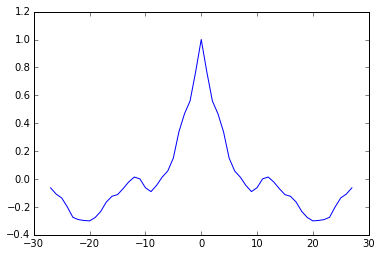

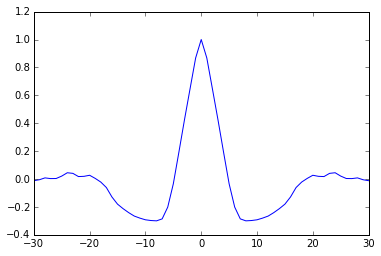

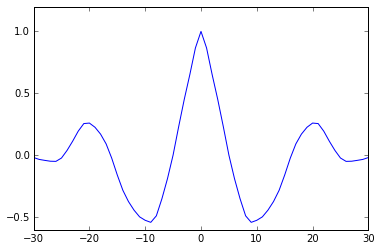

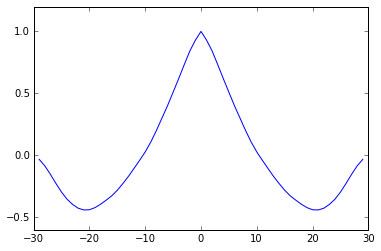

In [39]:
lag = np.arange(-Nt_Feb+1,Nt_Feb)
plt.figure()
plt.plot(lag, auto_Feb/auto_Feb.max())

lag = np.arange(-Nt_Aug+1,Nt_Aug)
plt.figure()
plt.plot(lag, auto_Aug/auto_Aug.max())

lag = np.arange(-Nt_May+1,Nt_May)
plt.figure()
plt.plot(lag, auto_May/auto_May.max())

lag = np.arange(-Nt_Nov+1,Nt_Nov)
plt.figure()
plt.plot(lag, auto_Nov/auto_Nov.max())

# Gulf Stream Region #

In [40]:
febGulf = SSH_Feb[:,jGulf,iGulf]-SSH_Feb[:,jGulf,iGulf].mean()
augGulf = SSH_Aug[:,jGulf,iGulf]-SSH_Aug[:,jGulf,iGulf].mean()
mayGulf = SSH_May[:,jGulf,iGulf]-SSH_May[:,jGulf,iGulf].mean()
novGulf = SSH_Nov[:,jGulf,iGulf]-SSH_Nov[:,jGulf,iGulf].mean()

In [41]:
auto_Feb = np.correlate(febGulf[:], febGulf[:], mode='full')
auto_Aug = np.correlate(augGulf[:], augGulf[:], mode='full')
auto_May = np.correlate(mayGulf[:], mayGulf[:], mode='full')
auto_Nov = np.correlate(novGulf[:], novGulf[:], mode='full')

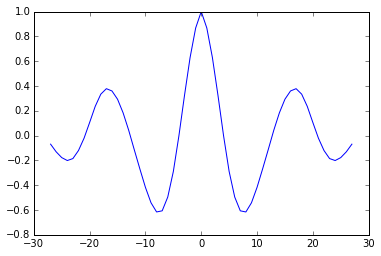

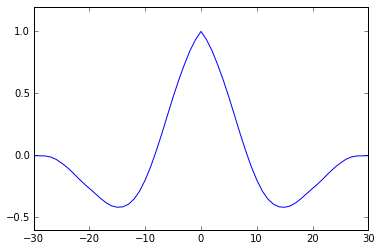

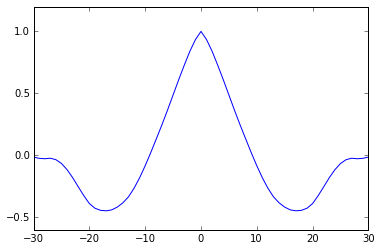

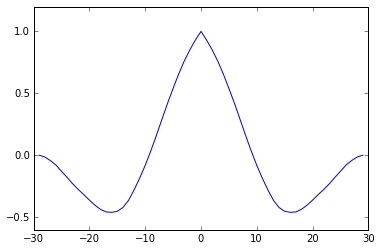

In [42]:
lag = np.arange(-Nt_Feb+1,Nt_Feb)
plt.figure()
plt.plot(lag, auto_Feb/auto_Feb.max())

lag = np.arange(-Nt_Aug+1,Nt_Aug)
plt.figure()
plt.plot(lag, auto_Aug/auto_Aug.max())

lag = np.arange(-Nt_May+1,Nt_May)
plt.figure()
plt.plot(lag, auto_May/auto_May.max())

lag = np.arange(-Nt_Nov+1,Nt_Nov)
plt.figure()
plt.plot(lag, auto_Nov/auto_Nov.max())

# East Pacific Region #

In [43]:
febEP = SSH_Feb[:,jeastPacific,ieastPacific]-SSH_Feb[:,jeastPacific,ieastPacific].mean()
augEP = SSH_Aug[:,jeastPacific,ieastPacific]-SSH_Aug[:,jeastPacific,ieastPacific].mean()
mayEP = SSH_May[:,jeastPacific,ieastPacific]-SSH_May[:,jeastPacific,ieastPacific].mean()
novEP = SSH_Nov[:,jeastPacific,ieastPacific]-SSH_Nov[:,jeastPacific,ieastPacific].mean()

In [44]:
auto_Feb = np.correlate(febEP[:], febEP[:], mode='full')
auto_Aug = np.correlate(augEP[:], augEP[:], mode='full')
auto_May = np.correlate(mayEP[:], mayEP[:], mode='full')
auto_Nov = np.correlate(novEP[:], novEP[:], mode='full')

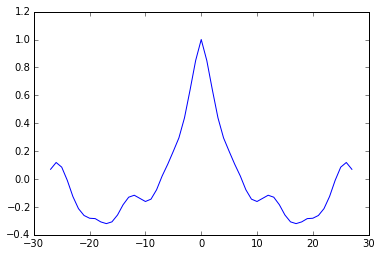

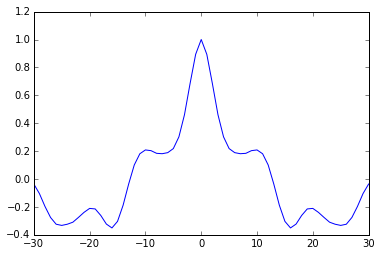

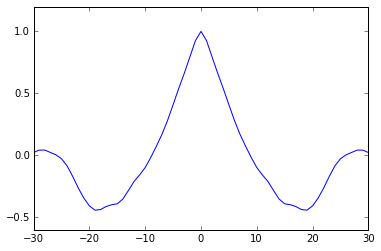

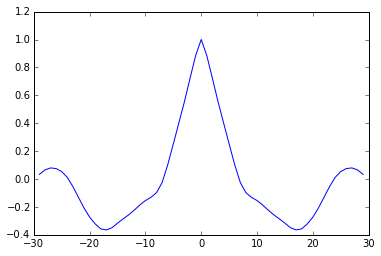

In [45]:
lag = np.arange(-Nt_Feb+1,Nt_Feb)
plt.figure()
plt.plot(lag, auto_Feb/auto_Feb.max())

lag = np.arange(-Nt_Aug+1,Nt_Aug)
plt.figure()
plt.plot(lag, auto_Aug/auto_Aug.max())

lag = np.arange(-Nt_May+1,Nt_May)
plt.figure()
plt.plot(lag, auto_May/auto_May.max())

lag = np.arange(-Nt_Nov+1,Nt_Nov)
plt.figure()
plt.plot(lag, auto_Nov/auto_Nov.max())